> # Introduction:

We will build a Linear Regression model for medical cost insurance dataset,
The data consists of age, sex, BMI, children,smoker, region as features
the target outcome is the "Charges", which we will try to predict based on the given features

> # Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> # Data Exploration:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates()

> # EDA:


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Charges Vs BMI')

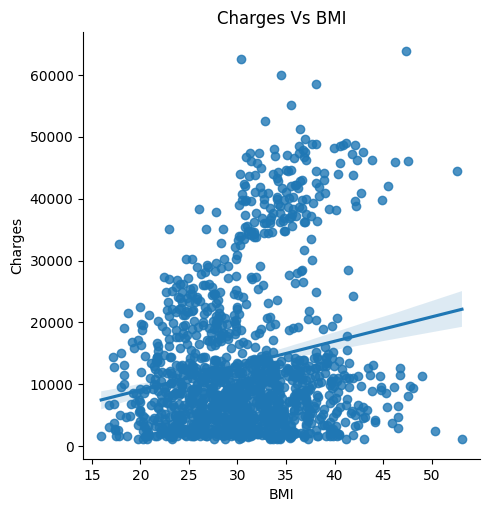

In [12]:
# bmi & charges

sns.lmplot(x= "bmi", y= "charges", data= df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Charges Vs BMI")

In [13]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

Text(0.5, 1.0, 'Charges Vs Children')

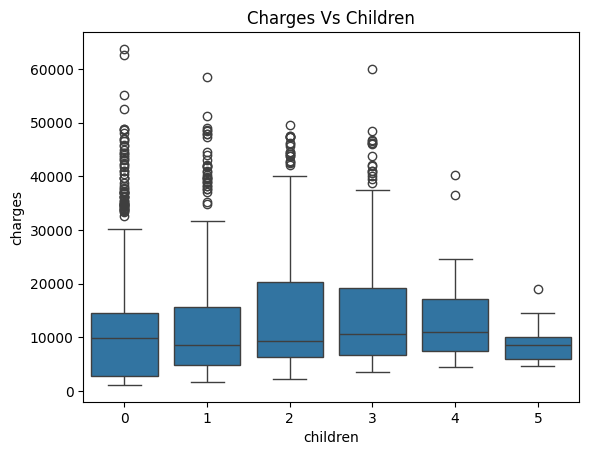

In [14]:
sns.boxplot(x= "children", y= "charges", data=df)
plt.title("Charges Vs Children")

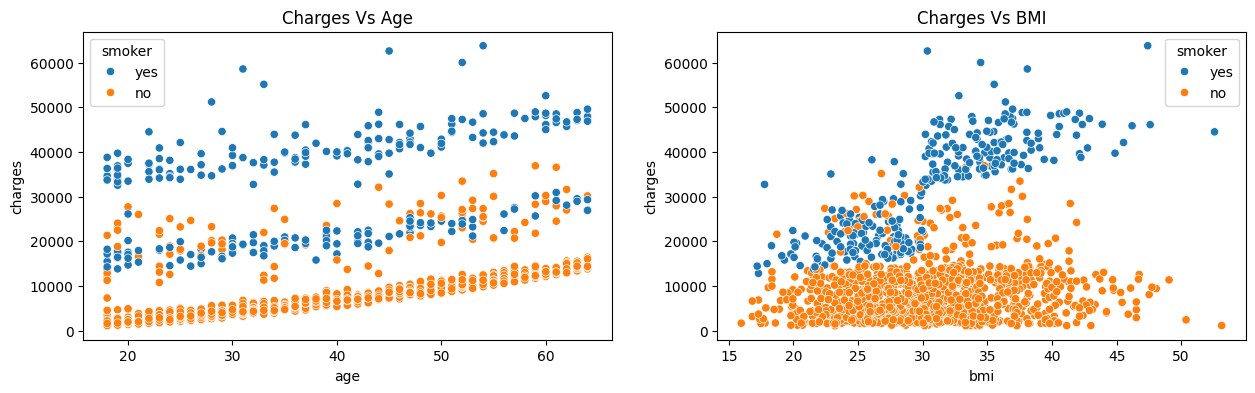

In [22]:
figure, axs = plt.subplots(1,2, figsize = (15,4))
sns.scatterplot(x= "age", y="charges", data=df, hue="smoker", ax = axs[0])
axs[0].set_title("Charges Vs Age")

sns.scatterplot(x= "bmi", y="charges", data=df, hue="smoker", ax = axs[1])
axs[1].set_title("Charges Vs BMI")
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [26]:
categorical_columns = ["sex","smoker", "region" ]
df_encode = pd.get_dummies(data = df, prefix= "OHE", prefix_sep= "_", columns= categorical_columns, drop_first= True, dtype= "int8")

In [27]:
df_encode

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [28]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   bmi            1337 non-null   float64
 2   children       1337 non-null   int64  
 3   charges        1337 non-null   float64
 4   OHE_male       1337 non-null   int8   
 5   OHE_yes        1337 non-null   int8   
 6   OHE_northwest  1337 non-null   int8   
 7   OHE_southeast  1337 non-null   int8   
 8   OHE_southwest  1337 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 58.8 KB


----------------------------------

> # ML

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# define features and target:
x = df_encode.drop("charges", axis=1) # Features
y = df_encode["charges"]  # Target



In [40]:
# splitting the data to train set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 23)

In [41]:
x_train.shape

(1069, 8)

In [42]:
x_test.shape

(268, 8)

In [43]:
# create the model:
model = LinearRegression()

# fit the model to the training data:
model.fit(x_train, y_train)

# make predictions for the test set:
y_pred = model.predict(x_test)

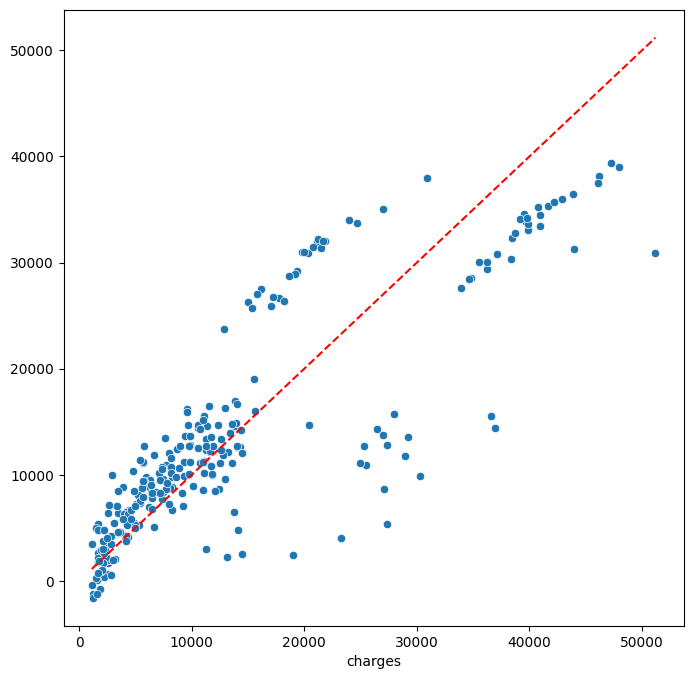

In [49]:
# visualize it
plt.figure(figsize= (8,8))
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color = "red")

In [51]:
df_encode.columns

Index(['age', 'bmi', 'children', 'charges', 'OHE_male', 'OHE_yes',
       'OHE_northwest', 'OHE_southeast', 'OHE_southwest'],
      dtype='object')

In [56]:
# use the model for making new predictions:
new_data = pd.DataFrame({"age": [25], "bmi": [20],"children": [3],'OHE_male': [1], 'OHE_yes': [0],
       'OHE_northwest': [1], 'OHE_southeast':[0], 'OHE_southwest': [0]})

prediction = model.predict(new_data)
print(f"The predicted charges for this new person is : {prediction[0]}")

The predicted charges for this new person is : 2262.3736777706
